# Feature Selection-technique-Information gain-mutual information in regression problem statemets

In [ ]:
import pandas as pd
housing_df=pd.read_csv("housing.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


here the sales_price is the target variable or dependent feature


In [ ]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
housing_df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


Now I will taking only the numerical column  and skipping the category columns because I odn't want to do any encoding techniques.

In [ ]:
numeric_list=['int16','int32','int64','float16','float32','float32','float64']
numeric_cols=list(housing_df.select_dtypes(include=numeric_list).columns)
numeric_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
housing_df=housing_df[numeric_cols]

In [ ]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
#drop the id column
housing_df=housing_df.drop('Id',axis=1)

In [ ]:
X=housing_df.drop('SalePrice',axis=1)#independent
y=housing_df['SalePrice']#dependent target

In [ ]:
# It is always good practice  to split train and test data to prevent overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
X_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60,NaN,9375,7,5,1997,1998,573.0,739,0,...,645,576,36,0,0,0,0,0,2,2009
682,120,NaN,2887,6,5,1996,1997,0.0,1003,0,...,431,307,0,0,0,0,0,0,11,2008
960,20,50.0,7207,5,7,1958,2008,0.0,696,0,...,0,117,0,0,0,0,0,0,2,2010
1384,50,60.0,9060,6,5,1939,1950,0.0,204,0,...,280,0,0,0,0,0,0,0,10,2009
1100,30,60.0,8400,2,5,1920,1950,0.0,290,0,...,246,0,0,0,0,0,0,0,1,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,82.0,9430,8,5,1999,1999,673.0,1163,0,...,856,0,128,0,0,180,0,0,7,2009
835,20,60.0,9600,4,7,1950,1995,0.0,442,0,...,436,290,0,0,0,0,0,0,2,2010
1216,90,68.0,8930,6,5,1978,1978,0.0,0,0,...,539,0,0,0,0,0,0,0,4,2010
559,120,NaN,3196,7,5,2003,2004,18.0,0,0,...,420,143,20,0,0,0,0,0,10,2006


In [ ]:
X_train.isnull().sum()

,0
MSSubClass,0
LotFrontage,189
LotArea,0
OverallQual,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,5
BsmtFinSF1,0
BsmtFinSF2,0


In [ ]:
y_train

,SalePrice
64,219500
682,173000
960,116500
1384,105000
1100,60000
...,...
763,337000
835,128000
1216,112000
559,234000


In [ ]:
y_train.isnull().sum()

np.int64(0)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
#determine the mutual information
mutual_info=mutual_info_regression(X_train.fillna(0),y_train)#fill some value in the null value by fillna()beacuse we don't want to change it by mean or medium and others technique'''
mutual_info

array([0.25348336, 0.20126533, 0.16723731, 0.52720301, 0.10237766,
       0.35420153, 0.25075058, 0.0992263 , 0.16220158, 0.00537024,
       0.11235616, 0.38419493, 0.31151026, 0.23159143, 0.00396659,
       0.48283722, 0.02530161, 0.00179371, 0.26791479, 0.07955057,
       0.03827374, 0.00642972, 0.18336924, 0.17124013, 0.27202463,
       0.37064899, 0.36777006, 0.06484267, 0.16905643, 0.01697055,
       0.00967354, 0.01052775, 0.        , 0.        , 0.        ,
       0.01298187])

the values are greater then 0 and less then 1 ,the higher the value the more better it is more dependent in that particular feature w.r.t dependent feature

In [ ]:
mutual_info_series=pd.Series(mutual_info,index=X_train.columns)#converting this into series and adding column
mutual_info_sort=mutual_info_series.sort_values(ascending=False)
mutual_info_sort


,0
OverallQual,0.527203
GrLivArea,0.482837
TotalBsmtSF,0.384195
GarageCars,0.370649
GarageArea,0.367770
YearBuilt,0.354202
1stFlrSF,0.311510
GarageYrBlt,0.272025
FullBath,0.267915
MSSubClass,0.253483


In [ ]:
mutual_info_sort[:10]

,0
OverallQual,0.527203
GrLivArea,0.482837
TotalBsmtSF,0.384195
GarageCars,0.370649
GarageArea,0.367770
YearBuilt,0.354202
1stFlrSF,0.311510
GarageYrBlt,0.272025
FullBath,0.267915
MSSubClass,0.253483


<Axes: >

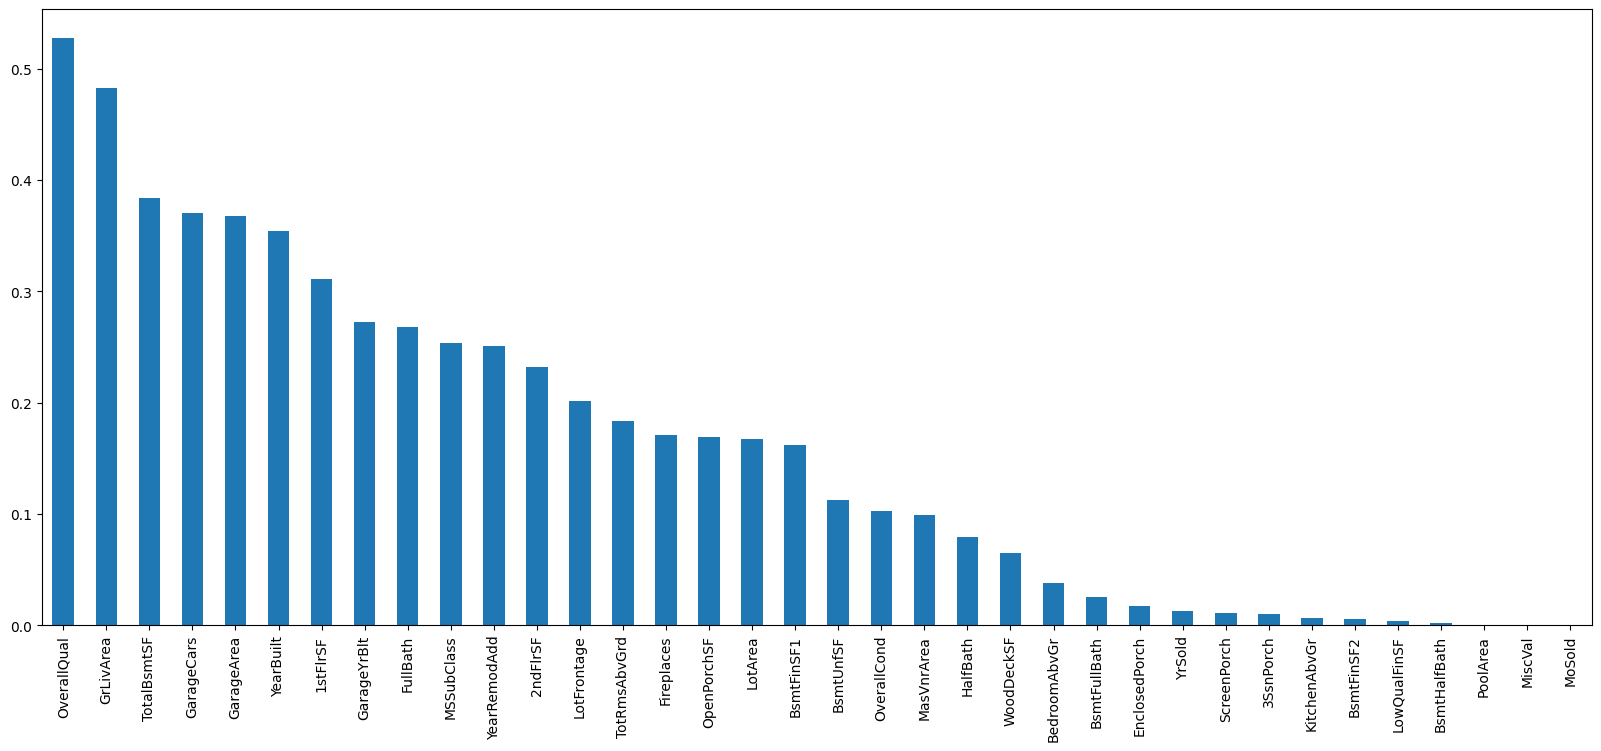

In [ ]:
mutual_info_sort.plot.bar(figsize=(20,8))

In [ ]:
from sklearn.feature_selection import SelectPercentile
#selecting top 20 percentile
selected_top20_columns=SelectPercentile(mutual_info_regression,percentile=20)
selected_top20_columns.fit(X_train.fillna(0),y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x7ca3e82d80e0>)

In [ ]:
selected_top20_columns.get_support()# filter  operation in pandas dataframe


array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

check wheather this belongs to top 20 feature are not ,whiecever is true getting selected

In [ ]:
X_train.columns[selected_top20_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

till garage area are the top 28th percentile that basically means 80 percentage of the entire population are having the dependency which is less than the garage area beacuse garagearea is the last one  